In [87]:
import numpy as np
import pandas as pd


# Array of users and books
# matlab: A = [1 1 0 1 0 0; 0 1 0 1 0 0; 0 0 1 1 0 1; 1 1 1 1 1 0; 0 0 1 0 0 1];

# A = np.array(
#     [
#         [0, 1, 0, 0, 0],
#         [1, 0, 0, 0, 1],
#         [0, 0, 0, 0, 1],
#         [0, 1, 1, 1, 0],
#         [1, 0, 1, 1, 1],
#         [1, 1, 1, 1, 1],
#         [0, 0, 1, 1, 1],
#         [0, 1, 0, 0, 0],
#         [0, 0, 1, 1, 1],
#         [1, 1, 0, 1, 1],
#     ]
# )

# example 1
A = np.array(
    [
        [1, 1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 0],
        [0, 0, 1, 0, 0, 1],
    ]
)

# A = np.array(
#     [
#         [1, 1, 1, 1, 0],
#         [0, 0, 0, 1, 1],
#         [0, 1, 0, 0, 0],
#         [1, 1, 1, 0, 1]
#     ])


U, S, Vh = np.linalg.svd(A)
V = Vh.T


In [88]:
np.set_printoptions(precision=2)
print(np.matrix(U))
print(np.matrix(np.diag(S)))
print(np.matrix(V))

[[-0.48  0.39  0.23 -0.75 -0.05]
 [-0.36  0.25  0.6   0.51  0.43]
 [-0.39 -0.6   0.37  0.09 -0.59]
 [-0.68  0.12 -0.66  0.29 -0.04]
 [-0.19 -0.64 -0.09 -0.29  0.68]]
[[3.1  0.   0.   0.   0.  ]
 [0.   1.92 0.   0.   0.  ]
 [0.   0.   1.08 0.   0.  ]
 [0.   0.   0.   0.61 0.  ]
 [0.   0.   0.   0.   0.45]]
[[-3.72e-01  2.66e-01 -4.01e-01 -7.64e-01 -2.17e-01 -1.05e-16]
 [-4.87e-01  3.98e-01  1.55e-01  7.94e-02  7.58e-01 -6.33e-19]
 [-4.07e-01 -5.85e-01 -3.55e-01  1.52e-01  1.02e-01 -5.77e-01]
 [-6.13e-01  8.63e-02  4.96e-01  2.29e-01 -5.64e-01  1.05e-16]
 [-2.19e-01  6.19e-02 -6.14e-01  4.78e-01 -9.78e-02  5.77e-01]
 [-1.88e-01 -6.46e-01  2.59e-01 -3.26e-01  2.00e-01  5.77e-01]]


In [89]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn")


def plot_data(mat, data_type, camera=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if camera != None:
        ax.view_init(elev=camera[0], azim=camera[1])
    for index, row in enumerate(mat):
        ax.scatter(row[0], row[1], row[2], alpha=0.8)
        ax.text(row[0], row[1], row[2],'{0} {1}'.format(data_type, index), size=10)
    plt.show()

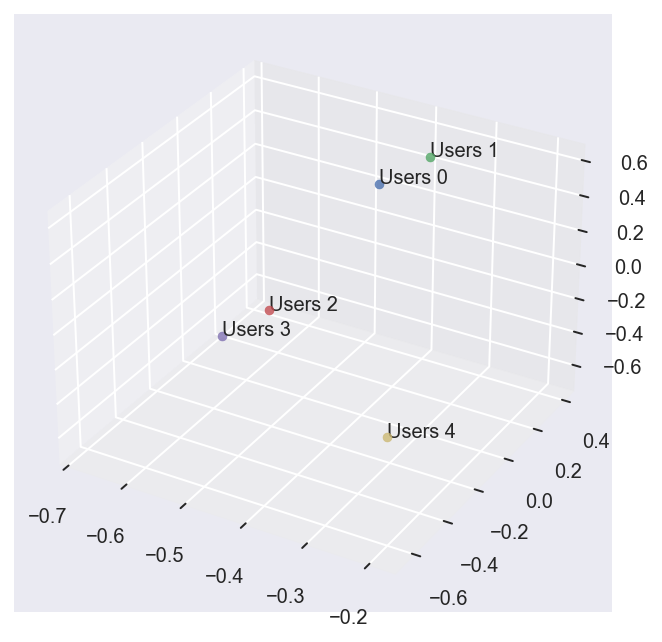

In [90]:
plot_data(U, "Users")

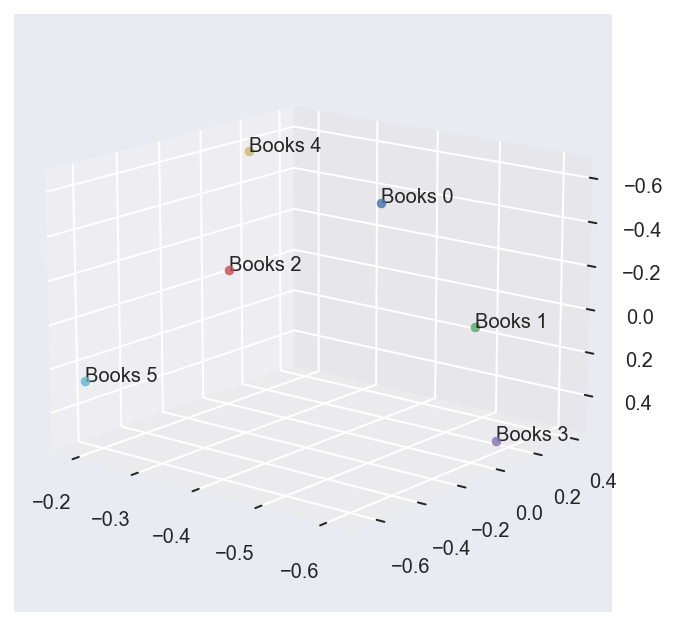

In [91]:
plot_data(V, "Books", [-164.5, 51.25])

In [100]:
def recommend(compare_index, V, output_num=2):
    rec = []
    for index, row in enumerate(V):
        if index != compare_index:
            print("index: " + str(index))
            print(V[index])
            print(V[compare_index])
            print(np.dot(V[index],V[compare_index]))
            rec.append([index, np.dot(V[index],V[compare_index])])
    final_rec = [i[0] for i in sorted(rec, key=lambda x: x[1],reverse=True)]
    print(final_rec)
    return final_rec[:output_num]

In [101]:
recommend(3, V)

index: 0
[-3.72e-01  2.66e-01 -4.01e-01 -7.64e-01 -2.17e-01 -1.05e-16]
[-6.13e-01  8.63e-02  4.96e-01  2.29e-01 -5.64e-01  1.05e-16]
-3.885780586188048e-16
index: 1
[-4.87e-01  3.98e-01  1.55e-01  7.94e-02  7.58e-01 -6.33e-19]
[-6.13e-01  8.63e-02  4.96e-01  2.29e-01 -5.64e-01  1.05e-16]
9.71445146547012e-17
index: 2
[-0.41 -0.58 -0.36  0.15  0.1  -0.58]
[-6.13e-01  8.63e-02  4.96e-01  2.29e-01 -5.64e-01  1.05e-16]
-8.326672684688674e-17
index: 4
[-0.22  0.06 -0.61  0.48 -0.1   0.58]
[-6.13e-01  8.63e-02  4.96e-01  2.29e-01 -5.64e-01  1.05e-16]
0.0
index: 5
[-0.19 -0.65  0.26 -0.33  0.2   0.58]
[-6.13e-01  8.63e-02  4.96e-01  2.29e-01 -5.64e-01  1.05e-16]
-6.938893903907228e-17
[1, 4, 5, 2, 0]


[1, 4]

In [111]:
row_index = 3
mat_without_row = np.delete(V, row_index, axis=0)

# Calculate dot product using matrix multiplication
dot_product = np.dot(mat_without_row, row)
dot_product

array([[-1.12e+00,  7.98e-01, -1.20e+00, -2.29e+00, -6.51e-01, -3.14e-16],
       [-1.46e+00,  1.19e+00,  4.64e-01,  2.38e-01,  2.27e+00, -1.90e-18],
       [-1.22e+00, -1.75e+00, -1.07e+00,  4.55e-01,  3.06e-01, -1.73e+00],
       [-6.56e-01,  1.86e-01, -1.84e+00,  1.43e+00, -2.94e-01,  1.73e+00],
       [-5.64e-01, -1.94e+00,  7.76e-01, -9.79e-01,  6.00e-01,  1.73e+00]])

In [120]:
np.dot(V[3], V[0])

-3.885780586188048e-16

In [123]:
def dot_product_with_rows(matrix, row_idx):
    row = matrix[row_idx]
    other_rows = np.delete(matrix, row_idx, axis=0)
    dot_products = np.dot(row, other_rows)
    return dot_products

In [127]:
row_idx = 3
matrix = V
row = matrix[row_idx]
other_rows = np.delete(matrix, row_idx, axis=0)
dot_products = np.dot(other_rows, row)

In [129]:
row

array([-6.13e-01,  8.63e-02,  4.96e-01,  2.29e-01, -5.64e-01,  1.05e-16])

In [130]:
V[3]

array([-6.13e-01,  8.63e-02,  4.96e-01,  2.29e-01, -5.64e-01,  1.05e-16])

In [131]:
other_rows

array([[-3.72e-01,  2.66e-01, -4.01e-01, -7.64e-01, -2.17e-01, -1.05e-16],
       [-4.87e-01,  3.98e-01,  1.55e-01,  7.94e-02,  7.58e-01, -6.33e-19],
       [-4.07e-01, -5.85e-01, -3.55e-01,  1.52e-01,  1.02e-01, -5.77e-01],
       [-2.19e-01,  6.19e-02, -6.14e-01,  4.78e-01, -9.78e-02,  5.77e-01],
       [-1.88e-01, -6.46e-01,  2.59e-01, -3.26e-01,  2.00e-01,  5.77e-01]])

In [132]:
V[0]

array([-3.72e-01,  2.66e-01, -4.01e-01, -7.64e-01, -2.17e-01, -1.05e-16])

In [136]:
np.dot(other_rows[0], row)

-3.885780586188048e-16

In [134]:
dot_products

array([-4.04e-16,  7.42e-17, -1.12e-16, -1.68e-18, -5.53e-17])